In [4]:
pip install yfinance pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install pandas_datareader

     -------------------------------------- 109.5/109.5 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
import yfinance as yf

# Define the list of stock symbols
stock_symbols = [
     'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'ADBE', 'TSLA', 'NVDA', 'INTC', 'AMD', 'CRM', 'IBM',
    'JNJ', 'PFE', 'AMGN', 'GILD', 'MRK', 'BMY', 'ABT', 'BIIB', 'TMO', 'REGN', 'VRTX',
    'JPM', 'GS', 'WFC', 'C', 'MS', 'AXP', 'COF', 'BLK', 'SCHW',
    'PG', 'KO', 'CL', 'CLX', 'KMB', 'GIS', 'HSY', 'STZ', 'CPB', 'K', 'MDLZ',
    'XOM', 'CVX', 'COP', 'SLB', 'OXY', 'HAL', 'KMI', 'PSX', 'EOG', 'MPC', 'VLO',
    'BA', 'GE', 'MMM', 'CAT', 'HON', 'UPS', 'FDX', 'UNP', 'LMT', 'EMR',
    'WMT', 'AMZN', 'HD', 'COST', 'TGT', 'LOW', 'WBA', 'KR', 'CVS', 'DG', 'ROST',
    'T', 'VZ', 'TMUS', 'CMCSA', 'CHTR', 'TDS',
    'SPG', 'PLD', 'PSA', 'EQR', 'AVB', 'O', 'WELL', 'BXP', 'VTR', 'DLR', 'ARE',
    'LULU', 'UAA', 'RL', 'TPR', 'CPRI', 'PVH', 'HBI', 'COLM', 'GES',
    'PSO', 'ATGE', 'CHGG', 'TAL', 'EDU', 'LOPE', 'STRA', 'LRN', '^GSPC'
]

# Define the date range for the past 10 years
end_date = pd.to_datetime('today')
start_date = end_date - pd.DateOffset(years=10)

# Create an empty DataFrame to store the data
all_asset_prices = pd.DataFrame()
all_log_returns = pd.DataFrame()

# Loop through each stock symbol and fetch the data
for symbol in stock_symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date, interval='1mo')
    
    # Extract the 'Adj Close' column as asset prices
    asset_prices = stock_data[['Adj Close']].copy()  # Create a copy to avoid the warning
    asset_prices.rename(columns={'Adj Close': symbol}, inplace=True)
    all_asset_prices = pd.concat([all_asset_prices, asset_prices], axis=1)
    
    # Calculate monthly log returns
    stock_data['Log_Returns'] = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))
    log_returns = stock_data[['Log_Returns']].copy()  # Create a copy to avoid the warning
    log_returns.rename(columns={'Log_Returns': symbol}, inplace=True)
    
    # Add the log returns dataframe to the list
    all_log_returns = pd.concat([all_log_returns, log_returns], axis=1)

# Add the 'Date' column as the first column
all_log_returns.insert(0, 'Date', stock_data.index)

# Specify the file paths where you want to save the data
log_returns_file_path = r"C:\Users\HHGiang\Documents\KEIO\Zemi\3F Zemi IEF\log_returns3.xlsx"

# Save the asset prices and log returns to separate Excel files
all_asset_prices.to_excel(prices_file_path, index=False)
all_log_returns.to_excel(log_returns_file_path, index=False)

# Print a message to confirm that the data has been saved
print(f"Log returns have been saved to {log_returns_file_path}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

C:\Users\HHGiang\AppData\Local\Temp\ipykernel_34840\2898558654.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_log_returns.insert(0, 'Date', stock_data.index)


Log returns have been saved to C:\Users\HHGiang\Documents\KEIO\Zemi\3F Zemi IEF\log_returns3.xlsx


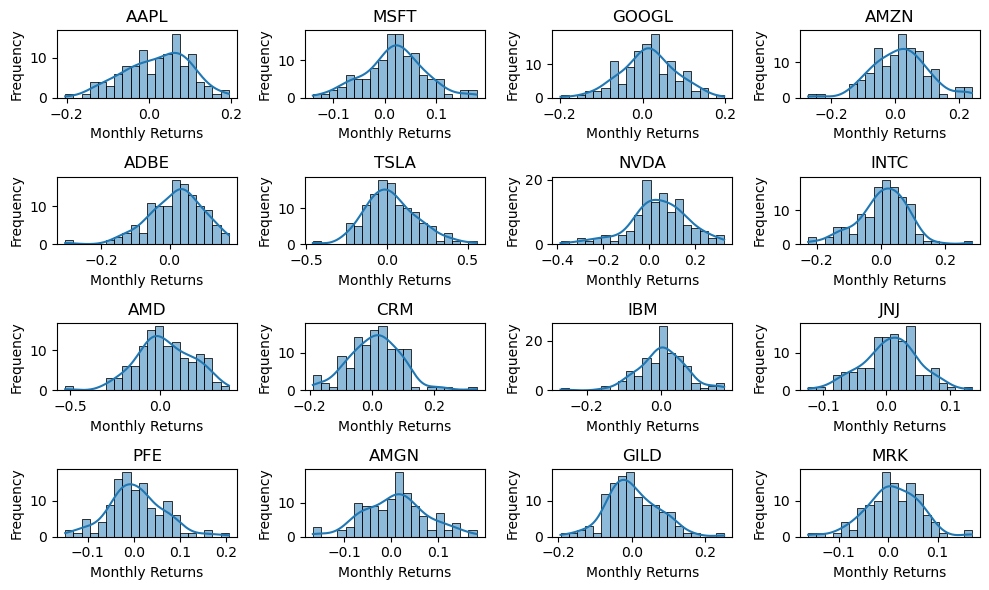

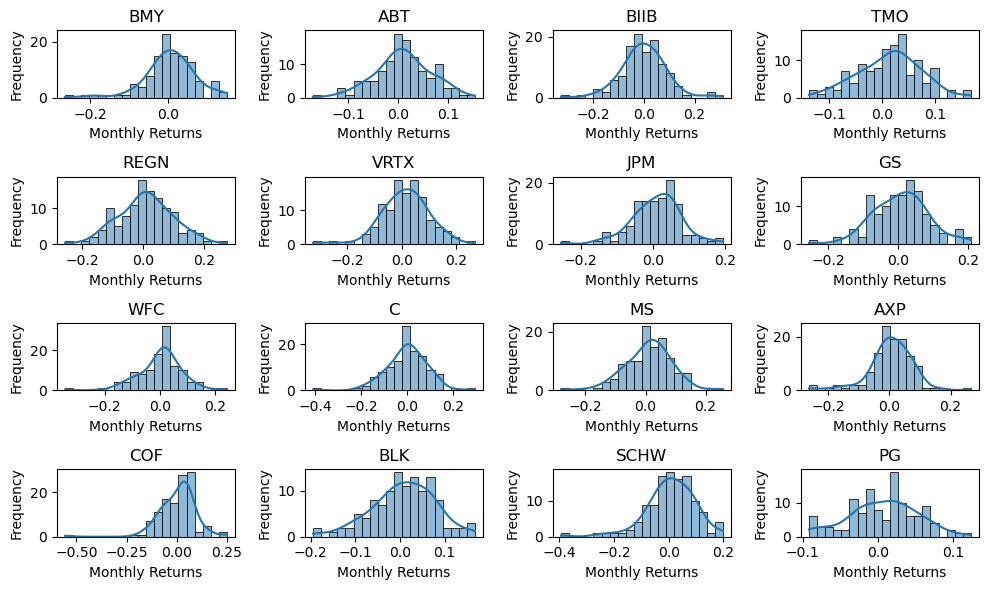

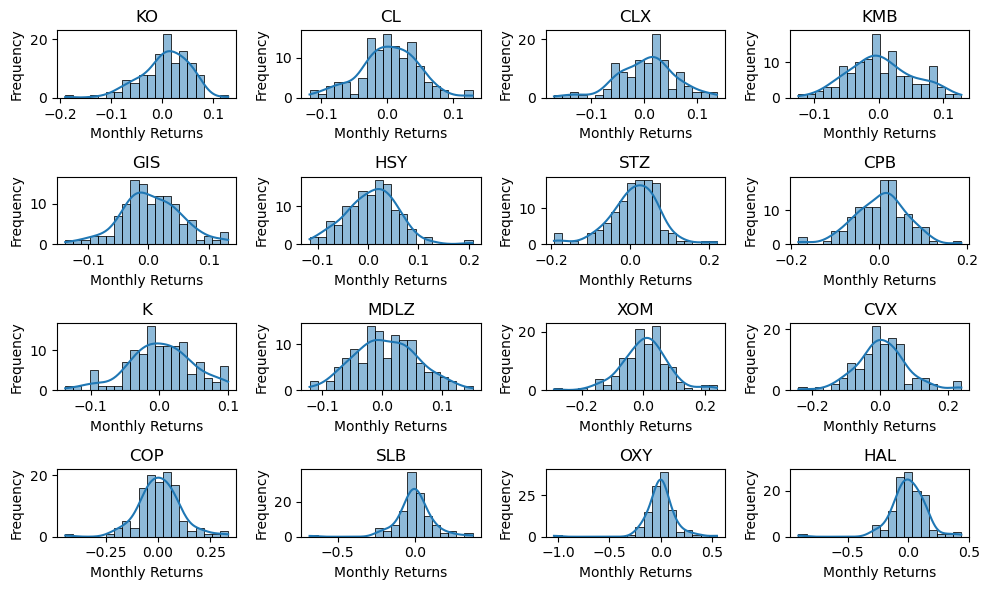

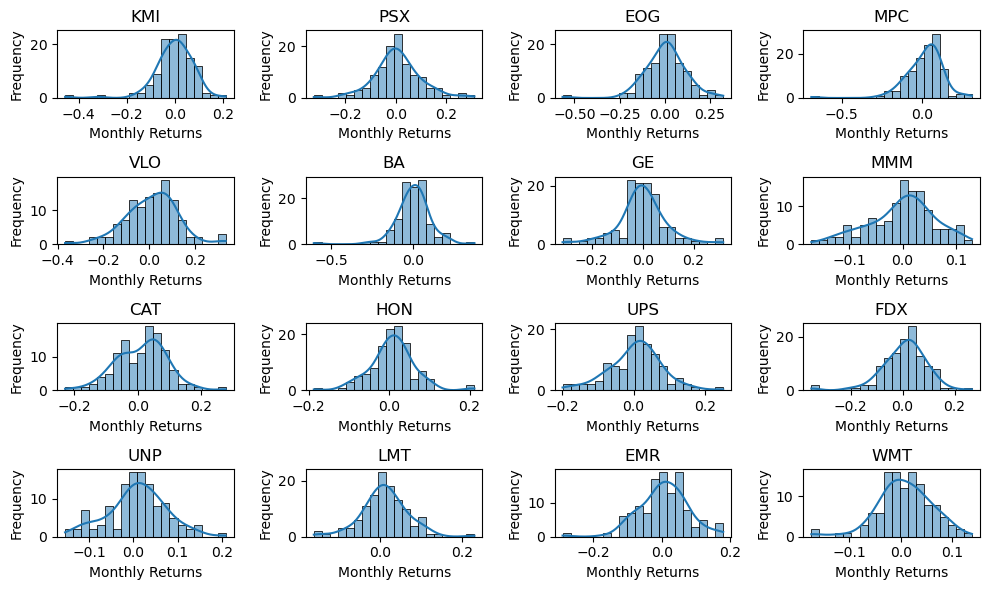

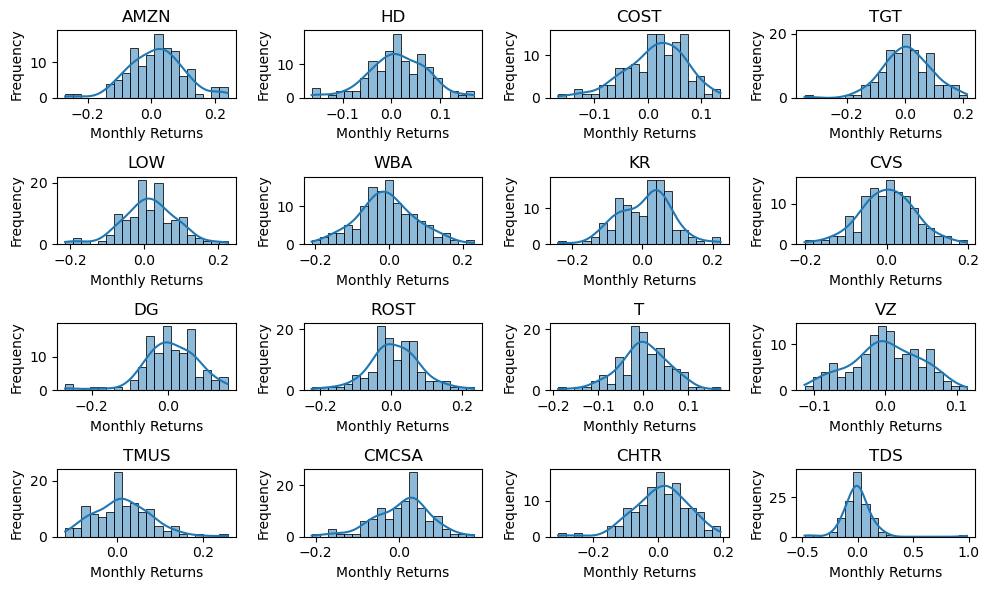

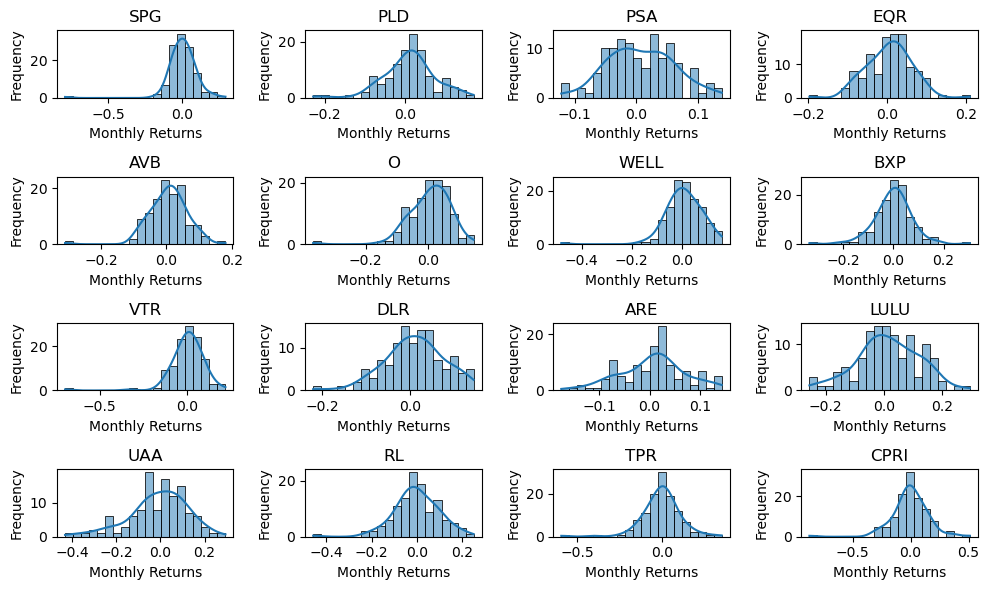

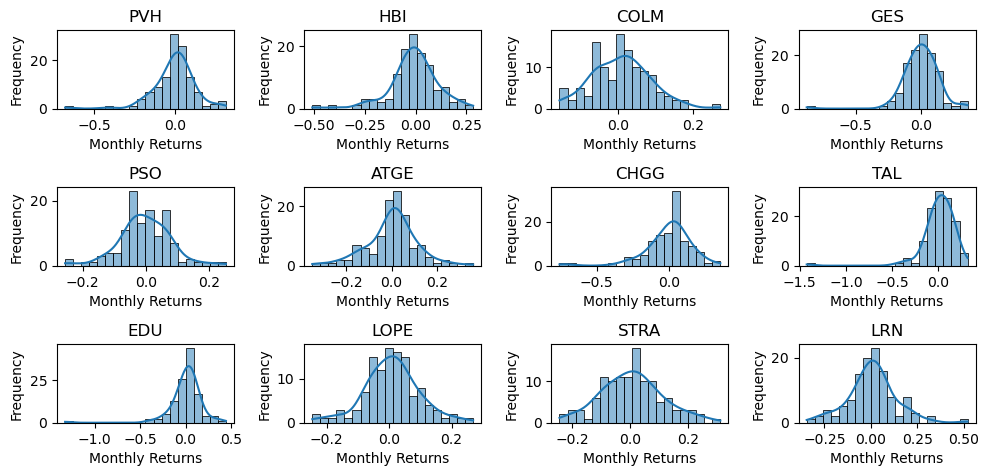

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns with stock returns (excluding 'Date' and '^GSPC' columns)
stock_returns = all_log_returns.drop(columns=['Date', '^GSPC'])

# Set the number of bins for the histograms
num_bins = 20

# Determine the number of figures needed based on the number of columns
num_columns = len(stock_returns.columns)
num_figures = (num_columns // 16) + 1  # Create 16 subplots per figure

# Loop through each stock and create separate figures
for figure_num in range(num_figures):
    # Create a new figure with a smaller size
    plt.figure(figsize=(10, 6))
    
    # Loop through 16 columns at a time and plot their histograms
    for i in range(16):
        subplot_num = figure_num * 16 + i
        if subplot_num < num_columns:
            plt.subplot(4, 4, i + 1)
            sns.histplot(stock_returns.iloc[:, subplot_num], bins=num_bins, kde=True)
            plt.title(stock_returns.columns[subplot_num])
            plt.xlabel('Monthly Returns')
            plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


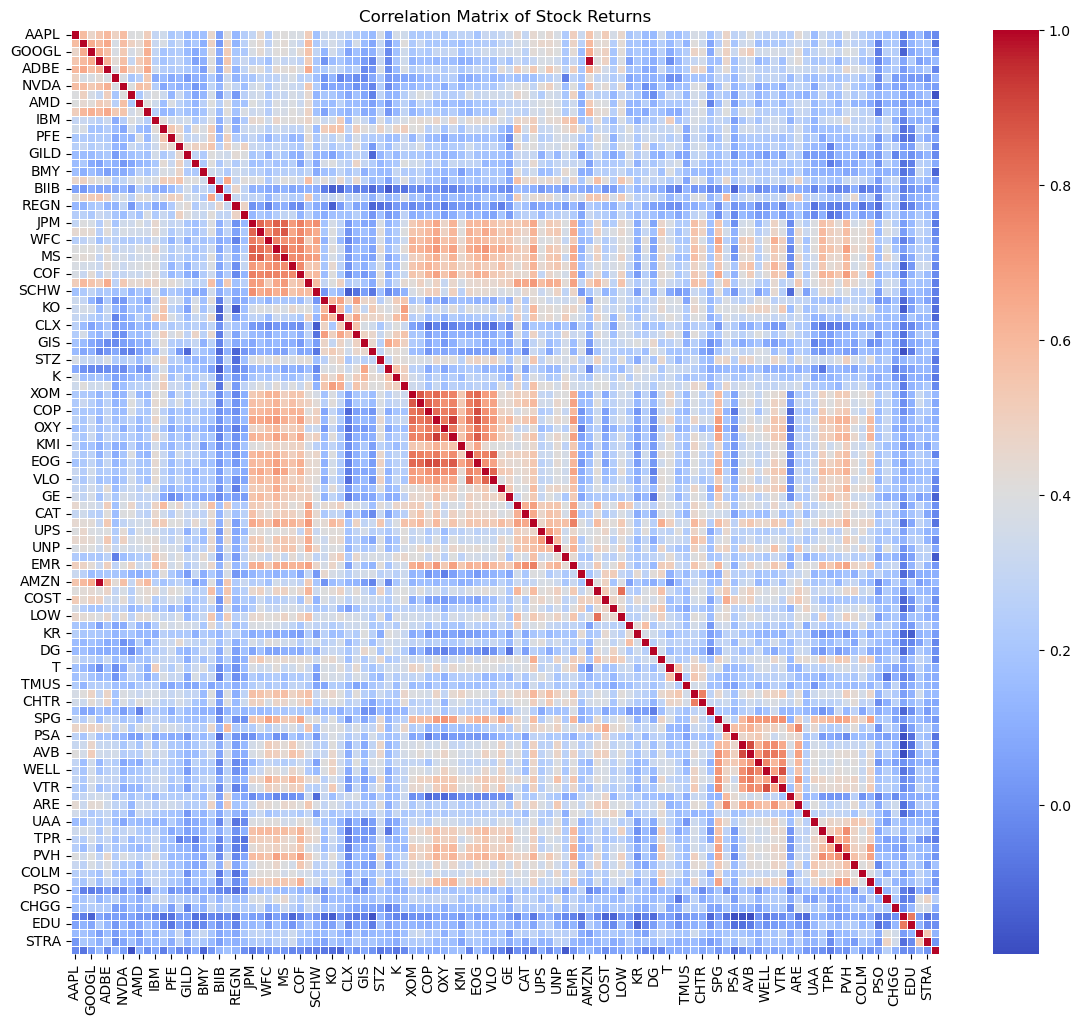

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns with stock returns (excluding 'Date' and '^GSPC' columns)
stock_returns = all_log_returns.drop(columns=['Date', '^GSPC'])

# Calculate the correlation matrix
correlation_matrix = stock_returns.corr()

# Create a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

# Customize the heatmap appearance
plt.title('Correlation Matrix of Stock Returns')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal

plt.show()


In [82]:
import pandas as pd
import statsmodels.api as sm


# Replace 'AAPL', 'MSFT', 'GOOGL', ... with the actual column names for the stocks you want to analyze
stock_columns = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'ADBE', 'TSLA', 'NVDA', 'INTC', 'AMD', 'CRM', 'IBM',
    'JNJ', 'PFE', 'AMGN', 'GILD', 'MRK', 'BMY', 'ABT', 'BIIB', 'TMO', 'REGN', 'VRTX',
    'JPM', 'GS', 'WFC', 'C', 'MS', 'AXP', 'COF', 'BLK', 'SCHW',
    'PG', 'KO', 'CL', 'CLX', 'KMB', 'GIS', 'HSY', 'STZ', 'CPB', 'K', 'MDLZ',
    'XOM', 'CVX', 'COP', 'SLB', 'OXY', 'HAL', 'KMI', 'PSX', 'EOG', 'MPC', 'VLO',
    'BA', 'GE', 'MMM', 'CAT', 'HON', 'UPS', 'FDX', 'UNP', 'LMT', 'EMR',
    'WMT', 'AMZN', 'HD', 'COST', 'TGT', 'LOW', 'WBA', 'KR', 'CVS', 'DG', 'ROST',
    'T', 'VZ', 'TMUS', 'CMCSA', 'CHTR', 'TDS',
    'SPG', 'PLD', 'PSA', 'EQR', 'AVB', 'O', 'WELL', 'BXP', 'VTR', 'DLR', 'ARE',
    'LULU', 'UAA', 'RL', 'TPR', 'CPRI', 'PVH', 'HBI', 'COLM', 'GES',
    'PSO', 'ATGE', 'CHGG', 'TAL', 'EDU', 'LOPE', 'STRA', 'LRN']

# Assuming the correct column name for market returns is '^GSPC'
market_symbol = '^GSPC'

# Filter the DataFrame to select the relevant columns
selected_columns = stock_columns.copy()
selected_columns.append(market_symbol)
df = df[selected_columns]

# Clean data: Remove rows with missing values in any column
df = df.dropna()

# Define a constant risk-free rate
df['Risk_Free_Rate'] = 0.03  # Assuming the risk-free rate is 3%

# Initialize variables to track the stock with the lowest beta
lowest_beta_stock = None
lowest_beta = float('inf')  # Initialize with positive infinity

# Initialize variables to track the stock with the highest beta
highest_beta_stock = None
highest_beta = float('-inf')  # Initialize with negative infinity

# Initialize a dictionary to store beta values
beta_values = {}

# Loop through each stock
for stock_symbol in stock_columns:
    # Define the dependent variable (stock returns)
    y = df[stock_symbol]

    # Define the independent variables
    X = df[market_symbol] - df['Risk_Free_Rate']
    X = sm.add_constant(X)

    # Fit the simple linear regression model (CAPM)
    model = sm.OLS(y, X).fit()

    # Get the CAPM beta (slope coefficient)
    beta = model.params[market_symbol]
    beta_values[stock_symbol] = beta

    # Update the stock with the lowest beta
    if beta < lowest_beta:
        lowest_beta = beta
        lowest_beta_stock = stock_symbol

    # Update the stock with the highest beta
    if beta > highest_beta:
        highest_beta = beta
        highest_beta_stock = stock_symbol

# Display beta values for all stocks
for stock_symbol, beta in beta_values.items():
    print(f"The CAPM beta for {stock_symbol} is: {beta:.4f}")

# Find the stock with the lowest and highest beta
print(f"The stock with the lowest beta is: {lowest_beta_stock} with beta = {lowest_beta:.4f}")
print(f"The stock with the highest beta is: {highest_beta_stock} with beta = {highest_beta:.4f}")


KeyError: '^GSPC'